In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ydata_profiling import ProfileReport
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import dtale
import itables
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfCredito = pd.read_excel('DataSet_ML.xlsx')
if 'Unnamed: 0' in dfCredito.columns:
    dfCredito = dfCredito.drop(columns=['Unnamed: 0'])
dfCredito.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,120000,female,university,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
1,50000,female,university,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [3]:
dfCredito.dtypes

LIMIT_BAL                          int64
SEX                               object
EDUCATION                         object
MARRIAGE                           int64
AGE                                int64
PAY_0                              int64
PAY_2                              int64
PAY_3                              int64
PAY_4                              int64
PAY_5                              int64
PAY_6                              int64
BILL_AMT1                          int64
BILL_AMT2                          int64
BILL_AMT3                          int64
BILL_AMT4                          int64
BILL_AMT5                          int64
BILL_AMT6                          int64
PAY_AMT1                           int64
PAY_AMT2                           int64
PAY_AMT3                           int64
PAY_AMT4                           int64
PAY_AMT5                           int64
PAY_AMT6                           int64
default payment next month (Y)    object
dtype: object

In [4]:
print(dfCredito.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')


In [5]:
caracteristicas = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dfCopia = dfCredito.copy()
variablesCategoricas = dfCredito.select_dtypes(include = ['object', 'string', 'category']).columns.tolist()
print('Variables Categoricas', variablesCategoricas)

Variables Categoricas ['SEX', 'EDUCATION', 'default payment next month (Y)']


In [6]:
dfCopia = pd.get_dummies(dfCopia, columns = variablesCategoricas, drop_first = True, dtype=int)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month (Y)_not default
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,1000,1000,1000,0,2000,0,0,0,1,0
1,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2019,1200,1100,1069,1000,0,0,0,1,1
2,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,1815,657,1000,1000,800,1,0,0,0,1
3,100000,2,23,-1,-1,-1,-1,-1,-1,11876,...,601,0,581,1687,1542,0,0,0,1,1
4,140000,1,28,-1,-1,2,-1,-1,-1,11285,...,0,432,1000,1000,1000,0,1,0,0,1


In [7]:
dfCopia.drop(['default payment next month (Y)_not default'], axis=1, inplace=True)
dfCopia.head(5)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,0,1000,1000,1000,0,2000,0,0,0,1
1,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,2000,2019,1200,1100,1069,1000,0,0,0,1
2,50000,2,37,-1,-1,-1,-1,-1,-1,64400,...,2500,1815,657,1000,1000,800,1,0,0,0
3,100000,2,23,-1,-1,-1,-1,-1,-1,11876,...,380,601,0,581,1687,1542,0,0,0,1
4,140000,1,28,-1,-1,2,-1,-1,-1,11285,...,3329,0,432,1000,1000,1000,0,1,0,0


In [8]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=25))
pca_pipe.fit(dfCopia)
modelo_pca = pca_pipe.named_steps['pca']
pca_pipe

,steps,"[('standardscaler', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,25
,copy,True
,whiten,False
,svd_solver,'auto'


In [9]:
modelo_pca

,n_components,25
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [10]:
componentes = pca_pipe.fit_transform(dfCopia)
modelo_pca.components_

array([[-1.21384864e-01,  2.88029130e-02, -7.51130836e-03,
         2.01087843e-02,  6.55485660e-02,  4.95507233e-02,
         5.54348812e-02,  5.03270040e-02,  4.56734106e-02,
         3.11846654e-01,  3.30798124e-01,  3.48108630e-01,
         3.54044041e-01,  3.52480435e-01,  3.43661585e-01,
         1.79866372e-01,  2.24296016e-01,  2.21754308e-01,
         2.21655577e-01,  2.12833389e-01,  2.09482223e-01,
         1.08987593e-04,  2.46881422e-02, -5.56327638e-03,
         5.65257663e-02],
       [-1.04778003e-01,  3.49820910e-02, -2.18648531e-02,
         3.41015401e-01,  3.88073333e-01,  4.19636859e-01,
         4.18096877e-01,  4.11929531e-01,  3.78270563e-01,
        -6.47986623e-02, -5.16162778e-02, -2.81763567e-02,
         6.67735460e-03,  2.12133227e-02,  3.37413735e-02,
        -1.14620193e-01, -1.08771837e-01, -7.82632045e-02,
        -7.49287840e-02, -7.02661370e-02, -5.17815103e-02,
         8.23836667e-03, -1.99611266e-02, -2.21937048e-02,
         4.66531243e-02],
    

In [11]:
var_ratio = modelo_pca.explained_variance_ratio_
var_ratio

array([0.28294967, 0.16124519, 0.06768458, 0.05063706, 0.04987947,
       0.04424896, 0.04155776, 0.0394383 , 0.03535118, 0.03085214,
       0.02877915, 0.02588533, 0.02554235, 0.02217348, 0.02204066,
       0.01623474, 0.01395187, 0.01276308, 0.00964484, 0.00622419,
       0.0047681 , 0.00360019, 0.00233256, 0.00128194, 0.00093321])

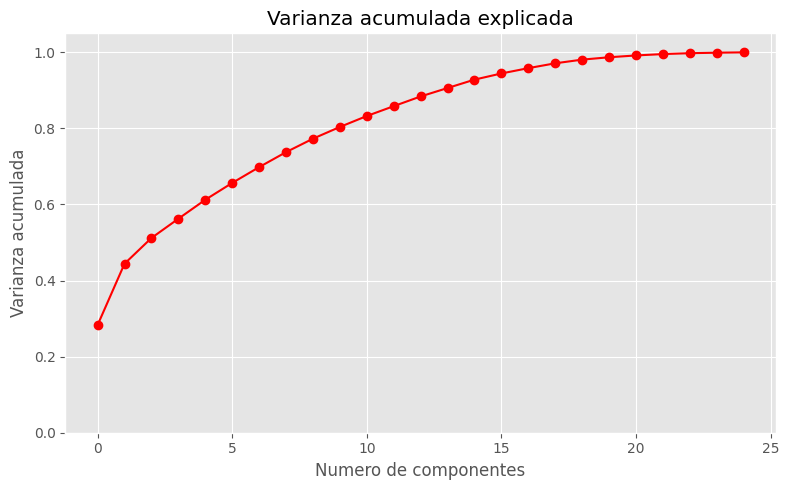

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(var_ratio),
    marker='o', linestyle='-', color='red'
)
plt.title('Varianza acumulada explicada')
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza acumulada')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
principalDf = pd.DataFrame(data=componentes
                          , columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', ])
principalDf.head(10)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-1.355312,1.128129,-1.702614,0.058265,-1.408487,-0.887108,-0.232236,-0.668575,-1.152895,-0.385006,...,0.875811,0.875638,-0.344319,-1.671641,-0.080340,-0.814706,0.449585,-0.009828,0.049999,0.014707
1,2.791021,-1.244507,-0.175803,1.469781,0.445029,0.662989,0.691265,-0.514242,-0.943970,-0.214533,...,-0.222045,0.129299,0.004260,0.071021,0.153884,0.157481,0.160646,-0.437889,-0.052680,0.071006
2,2.430801,-1.325519,-0.121585,-0.473974,2.057087,0.291071,0.131618,0.503505,0.853183,-0.552221,...,-0.760592,1.143677,0.401411,0.046015,0.225421,0.265192,0.336802,-0.618433,-0.313345,0.093777
3,-1.843347,-0.698363,-1.812436,-0.246784,-0.950064,-0.269559,-0.236843,-0.613543,-0.281863,0.590764,...,0.670347,0.832583,0.435804,-0.073216,0.073813,-0.027578,0.008297,0.194748,-0.196919,-0.010862
4,-0.694955,-0.229203,1.636045,-1.277312,-0.308021,1.200312,0.828296,-0.883800,0.289483,1.945516,...,0.753385,-0.263748,-0.661991,-0.105017,0.552260,0.688757,-0.103157,0.261628,0.053005,0.230607
5,-1.350608,-0.209193,1.476031,-2.034699,-0.730297,0.858257,0.150781,-0.675216,1.304007,2.006221,...,1.194695,0.749915,0.059474,-0.837002,0.882850,0.443887,-0.244527,0.073376,0.035774,0.112656
6,5.749609,1.869542,-1.006712,0.554484,1.278154,-0.496809,0.309282,0.106690,0.820260,0.958999,...,0.701557,0.128902,-0.354694,-0.610290,0.918893,-0.077635,0.673707,0.469157,0.023448,-0.826549
7,7.422383,-2.208398,-0.011253,-0.573541,-1.333727,-1.052478,-0.543301,0.516815,2.275927,-0.859134,...,-0.196495,0.057078,-0.233411,0.131943,0.047999,-0.073149,-0.120822,0.076680,-0.016652,-0.065695
8,2.177553,0.431820,-0.124590,-2.723166,0.862027,-2.598459,0.232978,-1.902519,-0.230505,-0.009244,...,0.808588,0.060447,-0.255379,-0.428057,-0.768932,-0.444576,-0.247824,0.095789,-0.353062,-0.027014
9,0.554466,3.146041,-0.694547,-1.970386,0.107597,2.552411,-0.350040,1.525383,1.139510,-0.192112,...,-0.467598,-0.077600,0.587606,-0.203933,0.317923,-0.299483,0.092107,-0.062816,-0.008258,0.015874


In [15]:
principalDF = pd.concat([principalDf, dfCredito[['default payment next month (Y)']]], axis=1)
principalDF.head(5)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,default payment next month (Y)
0,-1.355312,1.128129,-1.702614,0.058265,-1.408487,-0.887108,-0.232236,-0.668575,-1.152895,-0.385006,...,0.875638,-0.344319,-1.671641,-0.080340,-0.814706,0.449585,-0.009828,0.049999,0.014707,default
1,2.791021,-1.244507,-0.175803,1.469781,0.445029,0.662989,0.691265,-0.514242,-0.943970,-0.214533,...,0.129299,0.004260,0.071021,0.153884,0.157481,0.160646,-0.437889,-0.052680,0.071006,not default
2,2.430801,-1.325519,-0.121585,-0.473974,2.057087,0.291071,0.131618,0.503505,0.853183,-0.552221,...,1.143677,0.401411,0.046015,0.225421,0.265192,0.336802,-0.618433,-0.313345,0.093777,not default
3,-1.843347,-0.698363,-1.812436,-0.246784,-0.950064,-0.269559,-0.236843,-0.613543,-0.281863,0.590764,...,0.832583,0.435804,-0.073216,0.073813,-0.027578,0.008297,0.194748,-0.196919,-0.010862,not default
4,-0.694955,-0.229203,1.636045,-1.277312,-0.308021,1.200312,0.828296,-0.883800,0.289483,1.945516,...,-0.263748,-0.661991,-0.105017,0.552260,0.688757,-0.103157,0.261628,0.053005,0.230607,not default
